# Quantum Image Transfer Protocol

## Phase - 1 : Input

In [1]:
# importing required libraries

import PIL
import numpy as np
import matplotlib.pyplot as plt
import cv2
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute

In [2]:
img_name = input('Enter the Name of the file with .png extension: ')
# reading image file 
img = cv2.imread(img_name)

# # Convert BGR to RGB to print or get original image with original colors
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Enter the Name of the file with .png extension: BMW.png


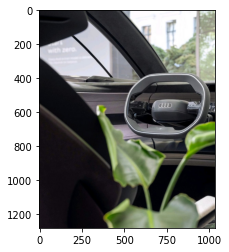

In [3]:
# Plotting image
plt.imshow(img)

In [4]:
# Printing the pixel values using ndimension array
arr = np.array(img)
print('Pixel values from Top To Bottom ---> ', len(arr))
print('Pixel values from Left To Right ---> ', len(arr[0]))

Pixel values from Top To Bottom --->  1280
Pixel values from Left To Right --->  1031


In [5]:
# Printing numpy array having pixels values.
print(type(arr))
print(arr)

<class 'numpy.ndarray'>
[[[ 24  23  28]
  [ 24  23  28]
  [ 25  24  29]
  ...
  [179 193 157]
  [179 193 157]
  [180 194 158]]

 [[ 20  19  24]
  [ 21  20  25]
  [ 22  21  26]
  ...
  [181 195 159]
  [181 195 159]
  [182 196 160]]

 [[ 17  16  21]
  [ 18  17  22]
  [ 20  19  24]
  ...
  [184 198 163]
  [185 199 164]
  [186 200 164]]

 ...

 [[ 31  24  32]
  [ 30  23  31]
  [ 29  22  30]
  ...
  [ 82  94  80]
  [ 95 107  93]
  [105 117 103]]

 [[ 30  23  31]
  [ 28  21  29]
  [ 26  19  27]
  ...
  [ 93 105  91]
  [112 124 110]
  [126 138 124]]

 [[ 29  22  30]
  [ 26  19  27]
  [ 23  16  24]
  ...
  [104 116 102]
  [127 139 125]
  [144 156 142]]]


In [6]:
# Initializing output numpy ndarray with same dimensions as the input array 
arr_out = np.zeros([len(arr), len(arr[0]), 3], dtype=int)

In [7]:
# Function to convert Decimal values to Binary
def DecimalToBinary(n):
    a=[]
    if(n>0):
        while(n>0):
            dig=n%2
            a.append(dig)
            n=n//2
        b = a
        if(len(a) != 9): # 9
            for i in range(9-len(a)): # 9
                b.append(0)
        b.reverse()
        stra = ''
        for i in b:
            val = str(i)
            stra += val
        return(stra)
    else:
        return('0'*9) # 9

## Phase - 2 : circuit

In [8]:
# Quantum Circuit function takes a single binary string as input
def circuit(bsting):
    ''' aD --- represents --- Alice Data Qubit
    aQ --- represents --- Alice Qubit
    bQ --- represents --- Bob Data Qubit '''

    single_char = bsting 
    #n = len(single_char)
    n = 9

    Alice_data = QuantumRegister(n, 'aD')
    Alice_qubit = QuantumRegister(n, 'aQ')
    Bob_qubit = QuantumRegister(n, 'bQ')
    cr = ClassicalRegister(n*3, 'c')
    circuit = QuantumCircuit(Alice_data, Alice_qubit, Bob_qubit, cr)

    i = 0
    for each in single_char:
        if(each == '1'):
            circuit.x(Alice_data[int(i)])
        i += 1
    circuit.barrier()


    for i in range(n):
        circuit.h(Alice_qubit[i])
        circuit.cx(Alice_qubit[i], Bob_qubit[i])
    circuit.barrier()


    for i in range(n):
        circuit.cx(Alice_data[n-1-i], Alice_qubit[n-1-i])
        circuit.h(Alice_data[n-1-i])
    circuit.barrier()


    for i in range(n):
        circuit.measure(Alice_data[i], cr[i])

    for i in range(n):
        circuit.measure(Alice_qubit[i], cr[i])
    circuit.barrier()


    for i in range(n):
        circuit.cx(Alice_qubit[i], Bob_qubit[i])
        circuit.cz(Alice_data[i], Bob_qubit[i])
    circuit.barrier()


    for i in range(n):
        circuit.measure(Bob_qubit[i], cr[i])

    # circuit.draw(output = 'mpl')

    ''' Getting counts from backend '''
    simulator_backend = Aer.get_backend('qasm_simulator')
    result = execute(circuit, simulator_backend, shots = 1).result()
    counts = result.get_counts()


    for key in counts:
        qv_out = key
    b = ''
    a = qv_out[len(qv_out)-9:]
    for i in range(len(a)):
        b = b + a[(-i-1)]
    return(b)

In [9]:
# Accessing each Binary string and sending through quantum circuit and getting output.
# Converting each output Binary string into Decimal value and storing it in a list'
for i in range(len(arr)):
    for j in range(len(arr[0])):
        for k in range(3):
            qv = DecimalToBinary(arr[i][j][k]) # input to the function is 218 and gets'011011010'
            #qv_out = circuit(qv) # input to the function is '000011011010' and teleported sting is also '011011010'
            dec_number= int(qv, 2) # Converts Binary values to Decimal values
            #print(dec_number)
            arr_out[i][j][k] = dec_number
    print('.', end = '')

print('\n Process completed !')
print('\n Hurray!😊 you have successfully Teleporated entire Image using Quantum Teleportation.')

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [10]:
# Checking whether the circuit is working fine or not with simple inputs.
s1 = '011011010'
s2 = '010110110'
output1 = circuit(s1)
output2 = circuit(s2)
print(f'For input {s1} to the Quantum Circuit, output is {output1}')
print(f'For input {s2} to the Quantum Circuit, output is {output2}')

For input 011011010 to the Quantum Circuit, output is 011011010
For input 010110110 to the Quantum Circuit, output is 010110110


## Phase - 3 : Output

In [11]:
# Printing the teleported pixel values using ndimension array 
print(arr_out)

[[[ 24  23  28]
  [ 24  23  28]
  [ 25  24  29]
  ...
  [179 193 157]
  [179 193 157]
  [180 194 158]]

 [[ 20  19  24]
  [ 21  20  25]
  [ 22  21  26]
  ...
  [181 195 159]
  [181 195 159]
  [182 196 160]]

 [[ 17  16  21]
  [ 18  17  22]
  [ 20  19  24]
  ...
  [184 198 163]
  [185 199 164]
  [186 200 164]]

 ...

 [[ 31  24  32]
  [ 30  23  31]
  [ 29  22  30]
  ...
  [ 82  94  80]
  [ 95 107  93]
  [105 117 103]]

 [[ 30  23  31]
  [ 28  21  29]
  [ 26  19  27]
  ...
  [ 93 105  91]
  [112 124 110]
  [126 138 124]]

 [[ 29  22  30]
  [ 26  19  27]
  [ 23  16  24]
  ...
  [104 116 102]
  [127 139 125]
  [144 156 142]]]


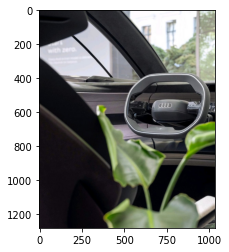

In [12]:
# converting the teleported ndimension array into actual image.
from PIL import Image
import numpy as np

# Convert the pixels into an array using numpy
array = np.array(arr_out, dtype=np.uint8)

# Use PIL to create an image from the new array of pixels
new_image = Image.fromarray(array)
plt.imshow(new_image)
new_image.save('Teleported_img.png')

In [13]:
print('\n-----------------------------------------------------------------------------------\n')
print('Quantum Image Transfer Protocol{ITP} is successfully completed.')


-----------------------------------------------------------------------------------

Quantum Image Transfer Protocol{ITP} is successfully completed.
